<a href="https://colab.research.google.com/github/nikhilkoduvalli/Machine_Learning/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#twitter_validation


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re


In [64]:
df=pd.read_csv('/content/twitter_validation.csv',header=None,encoding="ISO-8859-1")   #for  removing imogies  encoding="ISO-8859-1"
df.columns=['id','social_media','output','review']
df

,id,social_media,output,review
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [65]:
df.head()

,id,social_media,output,review
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [66]:
df.tail()

,id,social_media,output,review
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [67]:
df.shape

(1000, 4)

In [68]:
df.isna().sum()

,0
id,0
social_media,0
output,0
review,0


In [69]:
df.dtypes

,0
id,int64
social_media,object
output,object
review,object


In [70]:
df['social_media'].value_counts()

,count
social_media,
RedDeadRedemption(RDR),40
johnson&johnson,39
FIFA,38
PlayerUnknownsBattlegrounds(PUBG),38
LeagueOfLegends,37
ApexLegends,36
TomClancysRainbowSix,35
Nvidia,35
GrandTheftAuto(GTA),35


<Axes: xlabel='social_media', ylabel='count'>

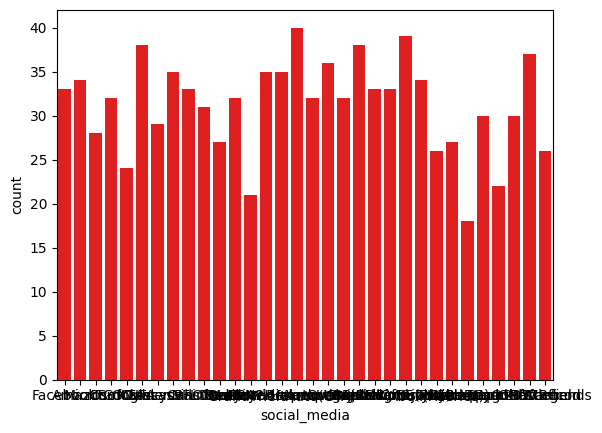

In [71]:
sns.countplot(x='social_media',data=df,color='red')


In [72]:
df['output'].value_counts()

,count
output,
Neutral,285
Positive,277
Negative,266
Irrelevant,172


<Axes: xlabel='output', ylabel='count'>

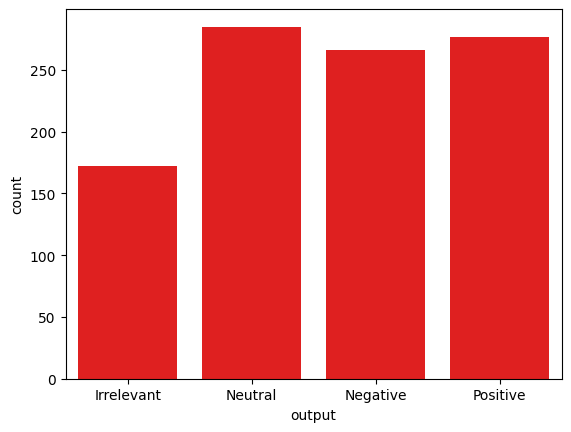

In [73]:
sns.countplot(x='output',data=df,color='red')


In [74]:
df.drop(df.index[(df['output']=='Irrelevant')],axis=0,inplace=True)
df


,id,social_media,output,review
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [75]:
df.reset_index(drop=True,inplace=True)
df

,id,social_media,output,review
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [76]:
df.drop(['id','social_media'],axis=1,inplace=True)
df

,output,review
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [77]:
df['output']=df['output'].map({'Positive':1,'Negative':-1,'Neutral':0})
df

,output,review
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [78]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
tweet=df.review
tweet

,review
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,"CSGO matchmaking is so full of closet hacking,..."
3,Now the President is slapping Americans in the...
4,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...
823,Please explain how this is possible! How can t...
824,Good on Sony. As much as I want to see the new...
825,Today sucked so itâs time to drink wine n pl...
826,Bought a fraction of Microsoft today. Small wins.


In [80]:
#tokenization
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweet=tweet.apply(lambda x:tk.tokenize(x)).apply(lambda x: ' '.join(x))  #for join token using space  .apply(lambda x: ' '.join(x))
tweet


,review
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi @EAHelp Iâ   ve had Madeleine McCann in m...
...,...
823,Please explain how this is possible ! How can ...
824,Good on Sony . As much as I want to see the ne...
825,Today sucked so itâ   s time to drink wine n...
826,Bought a fraction of Microsoft today . Small w...


In [81]:
tweet=tweet.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweet

,review
0,BBC News Amazon boss Jeff Bezos rejects clai...
1,Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi EAHelp I ve had Madeleine McCann in m...
...,...
823,Please explain how this is possible How can ...
824,Good on Sony As much as I want to see the ne...
825,Today sucked so it s time to drink wine n...
826,Bought a fraction of Microsoft today Small w...


In [82]:
from nltk.tokenize import TweetTokenizer
tweet=tweet.apply(lambda x:' '.join([w for w in x.split() if len(w)>=3]))   #to collect words grater than 3
tweet

,review
0,BBC News Amazon boss Jeff Bezos rejects claims...
1,Microsoft Why pay for WORD when functions poor...
2,CSGO matchmaking full closet hacking truly awf...
3,Now the President slapping Americans the face ...
4,EAHelp had Madeleine McCann cellar for the pas...
...,...
823,Please explain how this possible How can they ...
824,Good Sony much want see the new PS5 what going...
825,Today sucked time drink wine play borderlands ...
826,Bought fraction Microsoft today Small wins


In [83]:
#stumming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweet

,review
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay for word when function poor ...
2,csgo matchmak full closet hack truli aw game
3,now the presid slap american the face that rea...
4,eahelp had madelein mccann cellar for the past...
...,...
823,pleas explain how this possibl how can they le...
824,good soni much want see the new ps5 what go ri...
825,today suck time drink wine play borderland unt...
826,bought fraction microsoft today small win


In [84]:
#removing stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweet=tweet.apply(lambda x:[w for w in tk.tokenize(x) if w not in stop]).apply(lambda x:' '.join(x))
tweet

,review
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay word function poor samsungus...
2,csgo matchmak full closet hack truli aw game
3,presid slap american face realli commit unlaw ...
4,eahelp madelein mccann cellar past year littl ...
...,...
823,pleas explain possibl let compani overcharg sc...
824,good soni much want see new ps5 go right much ...
825,today suck time drink wine play borderland sun...
826,bought fraction microsoft today small win


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweet)
data

<828x3786 sparse matrix of type '<class 'numpy.float64'>'
	with 10508 stored elements in Compressed Sparse Row format>

In [86]:
print(data)

  (0, 538)	0.49155204783978756
  (0, 2290)	0.38864111655856126
  (0, 376)	0.1515362387424402
  (0, 633)	0.22681557001542715
  (0, 1836)	0.24577602391989378
  (0, 568)	0.2608257828483461
  (0, 2764)	0.2608257828483461
  (0, 808)	0.21432663830218204
  (0, 861)	0.17354914655342313
  (0, 309)	0.22681557001542715
  (0, 1999)	0.13277165480466424
  (0, 1131)	0.23509805002803952
  (0, 1005)	0.2608257828483461
  (0, 691)	0.2608257828483461
  (1, 2158)	0.24555654927912696
  (1, 3642)	0.26216072802580975
  (1, 2465)	0.3126902562590763
  (1, 3682)	0.36557591217188057
  (1, 1406)	0.4055823664694651
  (1, 2561)	0.3821800909185634
  (1, 2894)	0.4055823664694651
  (1, 798)	0.4055823664694651
  (2, 957)	0.3041178383627944
  (2, 2108)	0.3963165794888645
  (2, 1403)	0.3790982275064499
  :	:
  (825, 3386)	0.2560582225152133
  (825, 3396)	0.3395996844494918
  (825, 849)	0.2506921490798916
  (825, 1610)	0.2806965020161681
  (825, 3656)	0.35502404277063115
  (825, 1123)	0.37676345482672335
  (825, 3238)	0.37

In [87]:
data.shape

(828, 3786)

In [88]:
y=df['output'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=1)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

knn=KNeighborsClassifier(n_neighbors=7)
nb=MultinomialNB()
svm=SVC()
dt=DecisionTreeClassifier(criterion='entropy')

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [91]:
for i in [knn,nb,svm,dt]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)

  print(i)
  print('accuracy score',accuracy_score(y_test,y_pred))
  print('classification report',classification_report(y_test,y_pred))
  print('confusion matrix',confusion_matrix(y_test,y_pred))
  print('*'*100)

KNeighborsClassifier(n_neighbors=7)
accuracy score 0.4819277108433735
classification report               precision    recall  f1-score   support

          -1       0.40      0.76      0.53        74
           0       0.61      0.38      0.47        91
           1       0.55      0.35      0.42        84

    accuracy                           0.48       249
   macro avg       0.52      0.50      0.47       249
weighted avg       0.53      0.48      0.47       249

confusion matrix [[56 10  8]
 [40 35 16]
 [43 12 29]]
****************************************************************************************************
MultinomialNB()
accuracy score 0.6024096385542169
classification report               precision    recall  f1-score   support

          -1       0.58      0.69      0.63        74
           0       0.66      0.53      0.59        91
           1       0.58      0.61      0.59        84

    accuracy                           0.60       249
   macro avg       0.61     